In [6]:
#@title Mount Google Drive and Set Project Folder

from google.colab import drive
import os
from IPython.display import display
import ipywidgets as widgets

# Mount Google Drive
drive.mount('/content/drive')

# Create a text input widget for folder name
folder_input = widgets.Text(
    value='Leukemia_Project/CNV',
    placeholder='Enter the folder name (e.g., Leukemia_Project/CNV)',
    description='Folder:',
    layout=widgets.Layout(width='60%')
)

# Display the input box
display(folder_input)

# Function to change directory based on user input
def change_directory(change):
    folder_name = change['new']
    path = f"/content/drive/MyDrive/{folder_name}"
    os.makedirs(path, exist_ok=True)
    os.chdir(path)
    print(f" Current directory: {os.getcwd()}")

# Activate listener to change directory
folder_input.observe(change_directory, names='value')


Mounted at /content/drive


Text(value='Leukemia_Project/CNV', description='Folder:', layout=Layout(width='60%'), placeholder='Enter the f…

#Pathway Enrichment Analysis (PEA)

PEA was performed using the top 200 genes most affected by CNV events, based on the Total CNV Events score. Gene names were standardized and duplicates removed prior to analysis. The gene list was uploaded to g:Profiler, and enriched terms with FDR-adjusted p-values < 0.05 were selected. Significant terms were saved in /PEA/PEA_significant_terms_200genes.csv, and the top 10 were visualized using a bar plot colored by source type.

In [20]:
#@title 200 most significant terms
pea_results_200 = pd.read_csv("/content/drive/MyDrive/Leukemia_Project/CNV/PEA/PEA_significant_terms_200genes.csv")
pea_results.head()


,source,term_name,term_id,highlighted,adjusted_p_value,negative_log10_of_adjusted_p_value,term_size,query_size,intersection_size,effective_domain_size,intersections
0,GO:MF,protein binding,GO:0005515,True,0.034398,1.463471,14865,182,156,20196,"DUSP15,TTLL9,PDRG1,RALGAPA2,PBX4,PRKX,MYLK2,HM..."
1,TF,Factor: HES-1; motif: GGCRCGTGNC,TF:M11061,False,0.003098,2.508947,6391,191,94,20044,"DUSP15,TTLL9,PDRG1,RALGAPA2,PBX4,PRKX,LPAR2,DN..."
2,TF,Factor: Elk-1; motif: NRCCGGAAGTN,TF:M11433,False,0.005640,2.248751,7843,191,107,20044,"DUSP15,TTLL9,PDRG1,RALGAPA2,HM13,LBP,LPAR2,SCA..."
3,TF,Factor: Sp2; motif: WGGGCGG,TF:M05332,False,0.007961,2.099022,8793,191,114,20044,"DUSP15,TTLL9,PDRG1,RALGAPA2,PRKX,LPAR2,SCAPER,..."
4,TF,Factor: Sp6; motif: WGGGCGG,TF:M05361,False,0.007961,2.099022,8793,191,114,20044,"DUSP15,TTLL9,PDRG1,RALGAPA2,PRKX,LPAR2,SCAPER,..."


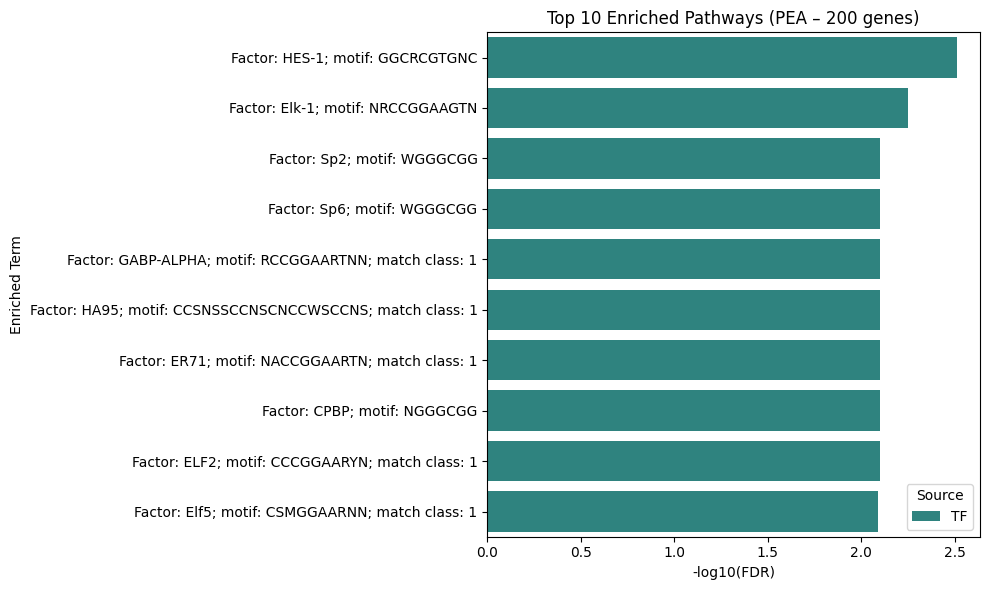

Plot saved to: PLOTS/top10_enriched_terms_pea.tiff
Enrichment results saved at: /content/drive/MyDrive/Leukemia_Project/CNV/PEA/PEA_significant_terms_200genes.csv


In [21]:
#@title Top 10 enriched pathway

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ordenar os termos mais significativos
top_terms = significant_terms.sort_values('adjusted_p_value').head(10)

# Configurar estilo
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_terms,
    y='term_name',
    x=-np.log10(top_terms['adjusted_p_value']),
    hue='source',
    dodge=False,
    palette='viridis'
)

# Títulos e eixos
plt.xlabel('-log10(FDR)')
plt.ylabel('Enriched Term')
plt.title('Top 10 Enriched Pathways (PEA – 200 genes)')
plt.legend(title='Source')
plt.tight_layout()

# Salvar no Drive
os.makedirs("PLOTS", exist_ok=True)
plt.savefig("/content/drive/MyDrive/Leukemia_Project/CNV/PEA/pea_top10_enriched_terms.tiff", format='tiff', dpi=300, bbox_inches='tight')

plt.show()

print("Plot saved to: PLOTS/top10_enriched_terms_pea.tiff")
print(f"Enrichment results saved at: {output_path}")

# GO Enrichment Analysis – Interpretation
To complement the pathway enrichment analysis, we performed a Gene Ontology (GO) enrichment analysis using the same top 200 genes based on CNV events. The objective was to identify enriched transcription factors, regulatory motifs, or functional categories associated with these recurrently altered genes.

The top GO terms included transcription factors such as HES-1, ER71, and E2F7, which are involved in cell cycle control, hematopoietic differentiation, and proliferation—central processes in leukemogenesis. All enrichment results were adjusted using False Discovery Rate (FDR) correction to ensure statistical robustness.

This analysis supports the hypothesis that CNVs in leukemia frequently affect transcriptional regulatory mechanisms and highlights potential functional targets for further investigation.

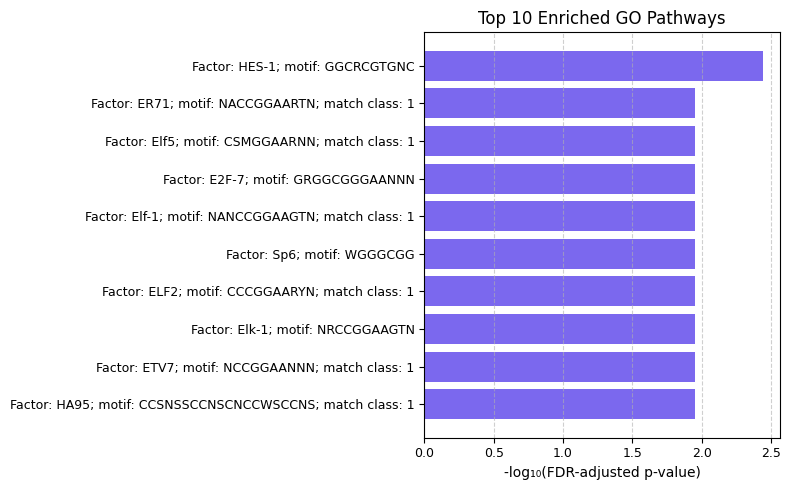

In [28]:

#@title **Top 10 Enriched GO Terms (adjusted p < 0.05)**

# Load GO enrichment results
go_path = "/content/drive/MyDrive/Leukemia_Project/CNV/GO/gProfiler_hsapiens_01-05-2025_16-56-49__intersections.csv"
go_results = pd.read_csv(go_path)

# Clean column names (optional but recommended)
go_results.columns = go_results.columns.str.strip()

# Filter for significant results (FDR-adjusted p < 0.05)
significant_go = go_results[go_results['adjusted_p_value'] < 0.05]

# Sort by significance and select top 10
top_go = significant_go.sort_values(by="negative_log10_of_adjusted_p_value", ascending=False).head(10)

# Plotting the top 10 GO terms
plt.figure(figsize=(8, 5))
bars = plt.barh(top_go['term_name'], top_go['negative_log10_of_adjusted_p_value'], color='mediumslateblue')

plt.xlabel("-log₁₀(FDR-adjusted p-value)", fontsize=10)
plt.title("Top 10 Enriched GO Pathways", fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

# Save to drive
os.makedirs("PLOTS", exist_ok=True)
plt.tight_layout()
plt.savefig("PLOTS/go_enrichment_top10.tiff", dpi=300, bbox_inches='tight')
plt.show()
